In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline 

In [20]:
dataframe = pd.ExcelFile("testetcc2.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [21]:
dataFrame

,Data,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,importacao_eletro,unidades_vendidas
0,2013-01-01,0.34,0.92,0.86,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,1923.327525,282886
1,2013-02-01,0.29,0.52,0.60,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,1617.160929,220859
2,2013-03-01,0.21,0.60,0.47,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,1931.472848,277268
3,2013-04-01,0.15,0.59,0.55,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,2143.186365,325865
4,2013-05-01,0.00,0.35,0.37,678,7.44,451106555,439054.200000,2.44,0,219928.6328,2199.286328,308411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021-02-01,2.53,0.82,0.86,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,1572.342157,186718
98,2021-03-01,2.94,0.86,0.93,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,1875.675391,208801
99,2021-04-01,1.51,0.38,0.31,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,1672.664462,191853
100,2021-05-01,4.10,0.96,0.83,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,1796.105421,206221


In [22]:
df1 = dataFrame.drop(['Data'], 1, inplace = False)
df = df1.drop(['importacao_eletro'], 1, inplace = False)

In [23]:
df

,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,0.34,0.92,0.86,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,0.29,0.52,0.60,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,0.21,0.60,0.47,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,0.15,0.59,0.55,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,0.00,0.35,0.37,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...,...,...,...
97,2.53,0.82,0.86,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,2.94,0.86,0.93,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1.51,0.38,0.31,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,4.10,0.96,0.83,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   var_IGPM                     102 non-null    float64
 1   var_INPC                     102 non-null    float64
 2   var_IPCA                     102 non-null    float64
 3   Salario_min                  102 non-null    int64  
 4   Selic_a_a                    102 non-null    float64
 5   Balanca_comercial_USS        102 non-null    int64  
 6   PIB_milhoes_RS               102 non-null    float64
 7   Var_producao_industrial_a_a  102 non-null    float64
 8   obitos_covid                 102 non-null    int64  
 9   importacao_eletro_1          102 non-null    float64
 10  unidades_vendidas            102 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 8.9 KB


In [25]:
df.isnull().sum()

var_IGPM                       0
var_INPC                       0
var_IPCA                       0
Salario_min                    0
Selic_a_a                      0
Balanca_comercial_USS          0
PIB_milhoes_RS                 0
Var_producao_industrial_a_a    0
obitos_covid                   0
importacao_eletro_1            0
unidades_vendidas              0
dtype: int64

In [26]:
## não existem valores faltantes

In [27]:
dataset = df

In [351]:
## Matriz de Correlação

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
var_IGPM,1.00,0.46,0.42,0.36,-0.42,0.19,0.44,0.17,0.54,-0.05,-0.19
var_INPC,0.46,1.00,0.97,-0.15,0.11,-0.20,-0.07,-0.00,0.12,0.01,0.02
var_IPCA,0.42,0.97,1.00,-0.21,0.15,-0.24,-0.10,0.03,0.08,0.03,0.09
Salario_min,0.36,-0.15,-0.21,1.00,-0.62,0.68,0.92,0.22,0.50,-0.50,-0.53
Selic_a_a,-0.42,0.11,0.15,-0.62,1.00,-0.26,-0.65,-0.38,-0.53,-0.09,0.07
Balanca_comercial_USS,0.19,-0.20,-0.24,0.68,-0.26,1.00,0.62,0.20,0.48,-0.56,-0.42
PIB_milhoes_RS,0.44,-0.07,-0.10,0.92,-0.65,0.62,1.00,0.37,0.60,-0.36,-0.30
Var_producao_industrial_a_a,0.17,-0.00,0.03,0.22,-0.38,0.20,0.37,1.00,0.52,0.37,0.37
obitos_covid,0.54,0.12,0.08,0.50,-0.53,0.48,0.60,0.52,1.00,0.01,-0.30
importacao_eletro_1,-0.05,0.01,0.03,-0.50,-0.09,-0.56,-0.36,0.37,0.01,1.00,0.62


## Análise significância

In [352]:
##SEPARANDO AS VARIAVEIS X e Y
X = dataset.iloc[:,:-1]
y = dataset['unidades_vendidas'].values

In [353]:
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [354]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     63.42
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.27e-36
Time:                        10:16:10   Log-Likelihood:                -1138.7
No. Observations:                 102   AIC:                             2299.
Df Residuals:                      91   BIC:                             2328.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.126e+05   4.33e+04      7.226      0.000    2.27e+05    3.98e+05
var_IGPM                     -435.1660   2702.269     -0.161      0.872   -5802.892    4932.560
var_INPC                    -3743.9844   1.98e+04     -0.190      0.850    -4.3e+04    3.55e+04
var_IPCA                     3951.2673   2.25e+04      0.176      0.861   -4.08e+04    4.87e+04
Salario_min                  -591.0934     47.200    -12.523      0.000    -684.850    -497.337
Selic_a_a                   -3236.2874    738.230     -4.384      0.000   -4702.690   -1769.884
Balanca_comercial_USS        2.748e-06   1.05e-06      2.629      0.010    6.72e-07    4.82e-06
PIB_milhoes_RS                  0.8134      0.078     10.371      0.000       0.658       0.969
Var_producao_industrial_a_a  2705.1671    348.179      7.769      0.000    2013.553    3396.781
obitos_covid                   -2.1747      0.200    -10.892      0.000      -2.571      -1.778
importacao_eletro_1             0.2323      0.102      2.274      0.025       0.029       0.435
==============================================================================
Omnibus:                        2.178   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.627
Skew:                          -0.179   Prob(JB):                        0.443
Kurtosis:                       3.504   Cond. No.                     9.63e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Retirando variaveis não significativas

In [355]:
## foram retiradas o INPC, IGPM, IPCA pois eram multicolineares e não significativas
dataset = dataset.drop(['var_INPC','var_IPCA','var_IGPM'], 1, inplace = False)

In [356]:
dataset

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...
97,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


In [357]:
dataf = dataset

In [358]:
dataf

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...
97,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


## Salvando dataset

In [359]:
dataf.to_csv('dataf.csv')

In [360]:
dataf.to_excel('dataf.xlsx')

In [361]:
df1 = pd.read_csv('dataf.csv')

In [362]:
df1n = df1.drop(['Unnamed: 0'], 1, inplace = False)
df1n

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...
97,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


In [363]:
df2 = pd.read_excel('dataf.xlsx')

In [364]:
df2 = df2.drop(['Unnamed: 0'], 1, inplace = False)

In [365]:
df2

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...
97,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


# Matriz de Correlação

In [366]:
## Matriz de Correlação

corr = dataf.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
Salario_min,1.00,-0.62,0.68,0.92,0.22,0.50,-0.50,-0.53
Selic_a_a,-0.62,1.00,-0.26,-0.65,-0.38,-0.53,-0.09,0.07
Balanca_comercial_USS,0.68,-0.26,1.00,0.62,0.20,0.48,-0.56,-0.42
PIB_milhoes_RS,0.92,-0.65,0.62,1.00,0.37,0.60,-0.36,-0.30
Var_producao_industrial_a_a,0.22,-0.38,0.20,0.37,1.00,0.52,0.37,0.37
obitos_covid,0.50,-0.53,0.48,0.60,0.52,1.00,0.01,-0.30
importacao_eletro_1,-0.50,-0.09,-0.56,-0.36,0.37,0.01,1.00,0.62
unidades_vendidas,-0.53,0.07,-0.42,-0.30,0.37,-0.30,0.62,1.00


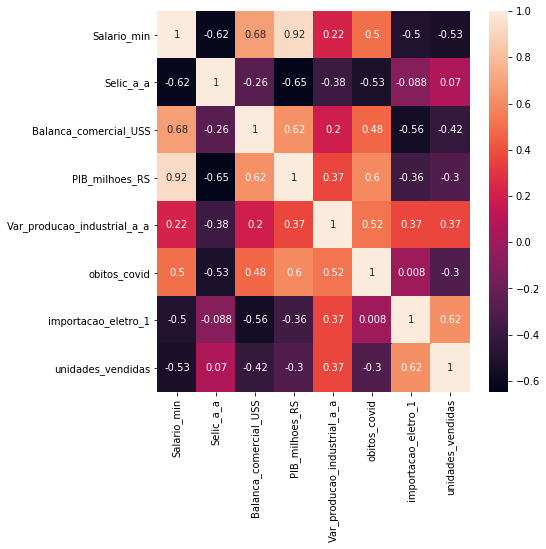

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.heatmap(dataf.corr(), annot=True)

## Modelo Regressão com STATS MODELS

In [368]:
##SEPARANDO AS VARIAVEIS X e Y 
X = dataset.iloc[:,:-1]
y = dataset['unidades_vendidas'].values

In [369]:
## Foco em estatistica
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [370]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     93.48
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.62e-39
Time:                        10:16:21   Log-Likelihood:                -1138.7
No. Observations:                 102   AIC:                             2293.
Df Residuals:                      94   BIC:                             2314.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.136e+05   4.06e+04      7.726      0.000    2.33e+05    3.94e+05
Salario_min                  -591.7639     43.549    -13.588      0.000    -678.232    -505.295
Selic_a_a                   -3226.2294    710.416     -4.541      0.000   -4636.776   -1815.683
Balanca_comercial_USS        2.779e-06   9.67e-07      2.875      0.005     8.6e-07     4.7e-06
PIB_milhoes_RS                  0.8125      0.074     11.004      0.000       0.666       0.959
Var_producao_industrial_a_a  2730.6525    322.241      8.474      0.000    2090.835    3370.470
obitos_covid                   -2.1982      0.177    -12.450      0.000      -2.549      -1.848
importacao_eletro_1             0.2311      0.094      2.450      0.016       0.044       0.418
==============================================================================
Omnibus:                        2.244   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.720
Skew:                          -0.167   Prob(JB):                        0.423
Kurtosis:                       3.542   Cond. No.                     9.04e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regressão Stats Models

In [371]:
modelo_v2.params

const                          313577.087893
Salario_min                      -591.763861
Selic_a_a                       -3226.229449
Balanca_comercial_USS               0.000003
PIB_milhoes_RS                      0.812506
Var_producao_industrial_a_a      2730.652521
obitos_covid                       -2.198226
importacao_eletro_1                 0.231096
dtype: float64

In [372]:
previsao = modelo_v2.predict(Xc)

In [373]:
previsao

0      274922.185885
1      244811.805592
2      274281.934249
3      317087.881318
4      303833.250324
           ...      
97     179857.248061
98     186595.468322
99     188772.090271
100    221152.759686
101    230285.601615
Length: 102, dtype: float64

Text(0, 0.5, 'Unidades vendidas')

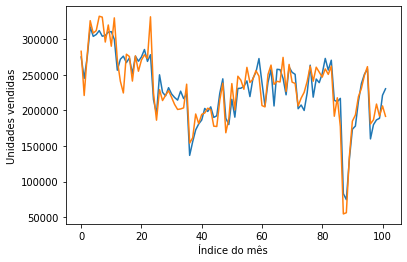

In [374]:
plt.plot(previsao)
plt.plot(y)
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')

#### Prevendo o modelo com dados novos, teste

In [375]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.model_selection as ms

In [376]:

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 0)
Xc = sm.add_constant(X_train)
Xb = sm.add_constant(X_test)

modelo_v1 = sm.OLS(y_train, Xc)
modelo_v2 = modelo_v1.fit()


In [377]:
z = modelo_v2.predict(Xb)

In [378]:
rmse = sqrt(mean_squared_error(y_test,z))
print(int(rmse))

16432


## Regressao Linear Múltipla 

In [379]:
from sklearn import linear_model

In [380]:
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [381]:
num_observ = len(dataf)
X = dataf.iloc[:,:-1].values
y = dataf['unidades_vendidas'].values

In [382]:
from sklearn.preprocessing import StandardScaler

In [383]:
scaler = StandardScaler()
scaler.fit(X)

X_norma = scaler.transform(X)

In [384]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X_norma, y, test_size = 0.2, random_state = 0)

In [385]:
len(X_test)

21

In [386]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [387]:
print(modelo.coef_)

[-76969.22687602 -10828.2206375    5123.64204781  59966.6283
  21669.35011053 -31737.74559809   7203.92615611]


In [388]:
print(modelo.intercept_)

231942.03915192914


In [389]:
w = modelo.predict(X_test)
w2= modelo.predict(X_train)

In [390]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,w))
rmsetreino = sqrt(mean_squared_error(y_train,w2))

In [391]:
print(int(rmse))

16432


In [392]:
print(int(rmsetreino))

17440


In [393]:
rteste = (r2_score(y_test,w))

In [394]:
rtreino = r2_score(y_train,w2)

## Avaliando erros do modelo de Reg. Linear

In [395]:
print(' Dados teste Reg. Linear: \n    R2 Score:', rteste,'\n','   RMSE',rmse)
print('\n')    
print(' Dados treino Reg. Linear: \n   R2 Score:', rtreino,'\n','  RMSE',rmsetreino)

 Dados teste Reg. Linear: 
    R2 Score: 0.7747990839519278 
    RMSE 16432.39097666143


 Dados treino Reg. Linear: 
   R2 Score: 0.8824842893142169 
   RMSE 17440.21340972819


## Graficos Previsões modelo Reg. Linear

Text(0.5, 1.0, 'Reg - Real X Previsto - Dados históricos')

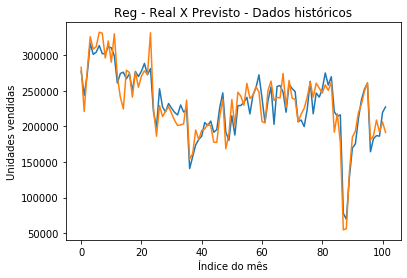

In [396]:
b = modelo.predict(X_norma)
plt.plot(b)
plt.plot(y)
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Reg - Real X Previsto - Dados históricos')

Text(0.5, 1.0, 'Regressão - Real X Previsto - Dados Históricos')

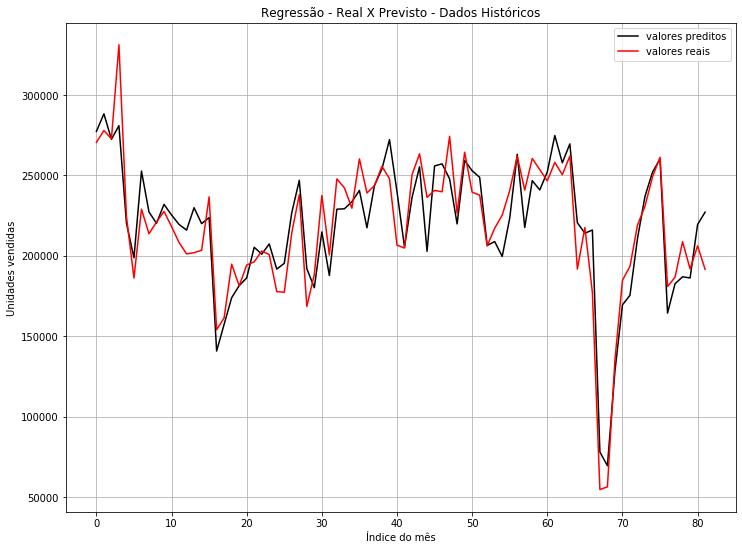

In [397]:
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(b[20:400],'-',color='black',label='valores preditos')
plt.plot(y[20:400],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()

plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Regressão - Real X Previsto - Dados Históricos')

Text(0.5, 1.0, 'Reg - Real X Previsto - Dados novos')

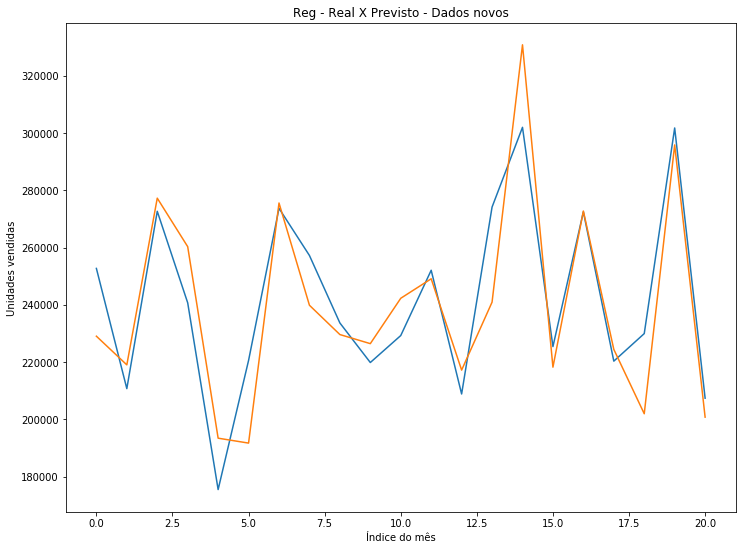

In [398]:
plt.plot(w)
plt.plot(y_test)
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Reg - Real X Previsto - Dados novos')

Text(0.5, 1.0, 'Reg - Real X Previsto - Dados novos')

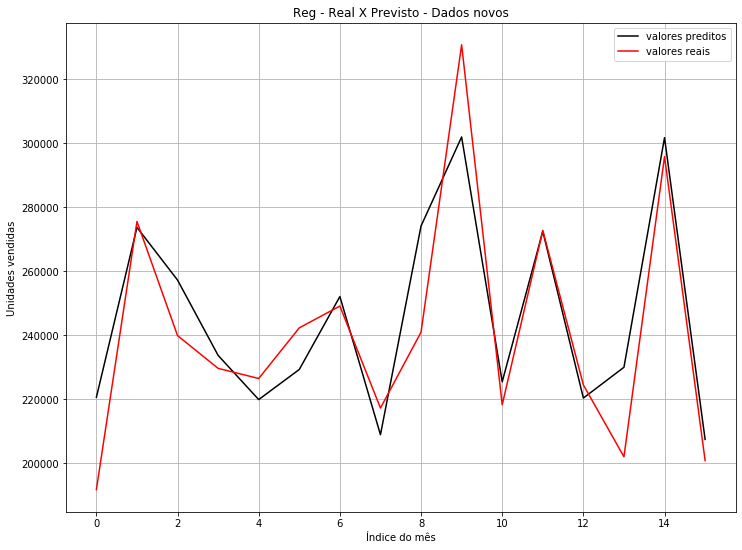

In [399]:
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(w[5:300],'-',color='black',label='valores preditos')
plt.plot(y_test[5:300],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Reg - Real X Previsto - Dados novos')

RMSE está no intervalo 0-infinito e retorna a magnitude dos erros e não sua direção
Quanto menor, melhor.

##  Random Forest Regressor

In [400]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# seprando X e Y
X = dataset.iloc[:,:-1]
y = dataset['unidades_vendidas'].values




## seprando x e y em treino e teste
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.2, random_state=0)

#criando modelo regressor random forest
arveres = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1) 

##treinando com dados de treino
arveres.fit(Xtr, ytr)

# Prevendo com dados de teste
p = arveres.predict(Xval)

# analisando erro

rmserf = sqrt(mean_squared_error(yval, p))
print(int((rmserf)))

15788


## Erros do modelo RF

In [401]:
rrf = r2_score(yval,p)
p2 = arveres.predict(Xtr)
rrftreino = r2_score(ytr,p2)
rmserft = sqrt(mean_squared_error(ytr, p2))


In [402]:
print(' Dados teste Reg. Linear: \n    R2 Score:', rrf,'\n','   RMSE',rmserf)
print('\n')    
print(' Dados treino Reg. Linear: \n   R2 Score:', rrftreino,'\n','  RMSE',rmserft)

 Dados teste Reg. Linear: 
    R2 Score: 0.792094997949913 
    RMSE 15788.764693924984


 Dados treino Reg. Linear: 
   R2 Score: 0.9571116322070939 
   RMSE 10535.947273040778


## Importância dos indicadores 

In [403]:
## Select K best ja faz a normalização dos dados

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

k=7
selector = SelectKBest(score_func=f_regression,k=7)
Xtrain2 = selector.fit_transform(Xtr,ytr)
Xval2 = selector.transform(Xval)

mdl = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
mdl.fit(Xtrain2,ytr)

p = mdl.predict(Xval2)

score = sqrt(mean_squared_error(yval, p))

print("k = {} - RMSE = {}".format(k, score))

k = 7 - RMSE = 15788.764693924984


In [404]:
pd.Series(selector.scores_, index=Xtr.columns)

Salario_min                    29.127914
Selic_a_a                       0.460588
Balanca_comercial_USS          20.095861
PIB_milhoes_RS                  5.325617
Var_producao_industrial_a_a    13.273195
obitos_covid                    7.702450
importacao_eletro_1            43.561907
dtype: float64

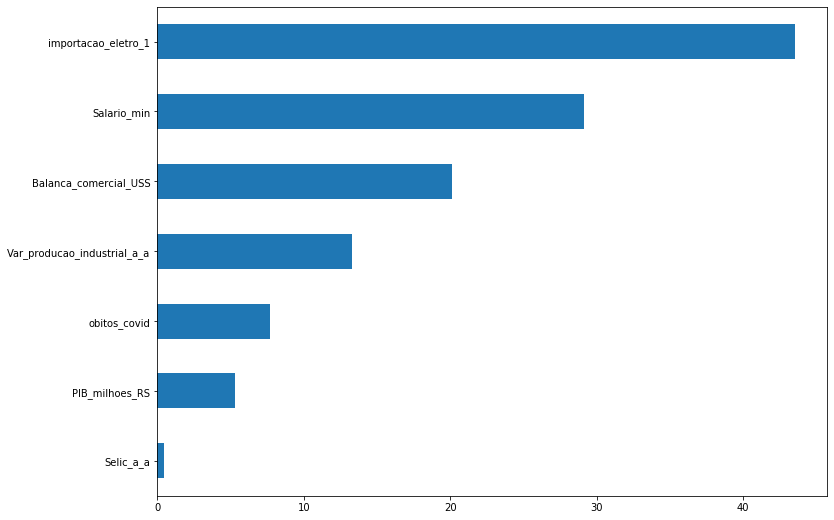

In [405]:
pd.Series(selector.scores_, index=Xtr.columns).sort_values().plot.barh()

In [406]:
## Random forest foi utilizado para identificar as variaveis

In [407]:
## as variaveis mais importante são a importacao, salario minimo....

Em proporções, quão importante cada feature é para o modelo de AM, onde quanto maior o valor, mais importante a feature é para o modelo

A Selic norteia todas as operações da economia brasileira que envolvem juros, como empréstimos, aplicações financeiras e financiamentos.

Em outras palavras, quando a taxa Selic sobe, os demais juros praticados no país também tendem a crescer.

O crescimento do PIB está relacionado com a ascensão da economia. Quanto maior o PIB, maior é a renda de um determinado lugar, portanto, por vezes, o PIB está relacionado com a qualidade de vida.

## Gráficos de previsões Random Forest

Text(0.5, 1.0, 'Random Forest - Real X Previsto - Dados Históricos')

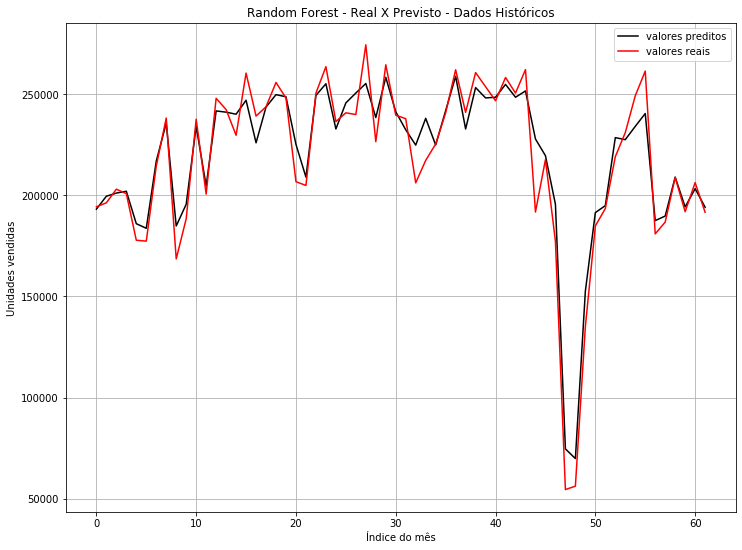

In [409]:
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(l[40:400],'-',color='black',label='valores preditos')
plt.plot(y[40:400],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Random Forest - Real X Previsto - Dados Históricos')

## Comparando previsao com dados novos

Text(0.5, 1.0, 'Random Forest - Real X Previsto - Dados novos')

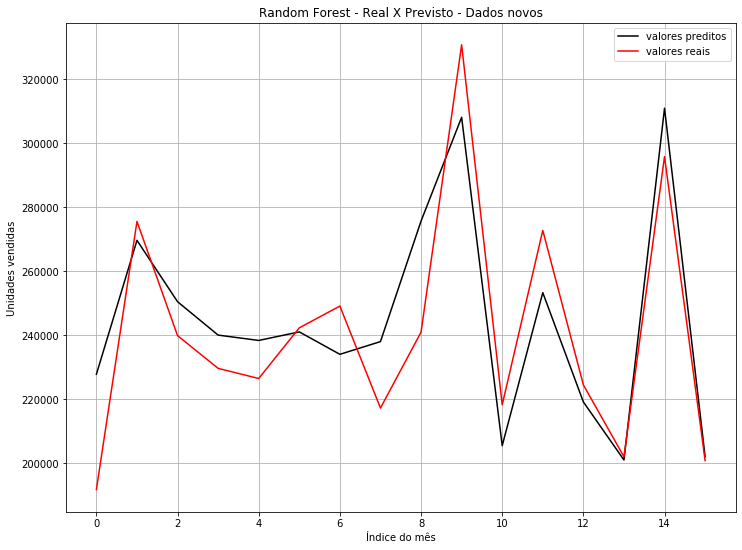

In [411]:
plt.rcParams['figure.figsize'] = (12,9)
plt.plot(p[5:300],'-',color='black',label='valores preditos')
plt.plot(yval[5:300],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Random Forest - Real X Previsto - Dados novos')

## Análise 

In [28]:
# Bibliotecas para ler/manipular/ver nossos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo
from mlxtend.plotting import plot_decision_regions

In [29]:
dataset

,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,0.34,0.92,0.86,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,0.29,0.52,0.60,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,0.21,0.60,0.47,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,0.15,0.59,0.55,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,0.00,0.35,0.37,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...,...,...,...
97,2.53,0.82,0.86,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,2.94,0.86,0.93,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1.51,0.38,0.31,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,4.10,0.96,0.83,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


In [251]:
dataset.describe()

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
count,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000
mean,888.647059,8.570098,2.548571e+09,544044.564052,-1.097941,5079.078431,157895.419112,231506.549020
std,132.102769,3.992893,2.994889e+09,72081.309984,7.863797,14683.708864,33852.274071,48407.015845
min,678.000000,1.570000,-4.496455e+09,398645.400000,-27.610000,0.000000,80056.556700,54580.000000
25%,788.000000,5.942500,3.231693e+08,487356.725000,-5.165000,0.000000,135599.588375,202212.250000
50%,937.000000,7.960000,2.621230e+09,538995.000000,-1.630000,0.000000,154712.157500,236545.000000
75%,998.000000,12.010000,4.418438e+09,593674.175000,2.425000,0.000000,178708.122900,260517.000000
max,1100.000000,15.660000,1.025090e+10,723966.100000,34.660000,82266.000000,244759.184300,332087.000000


In [252]:
dataset['unidades_vendidas'].describe()

count       102.000000
mean     231506.549020
std       48407.015845
min       54580.000000
25%      202212.250000
50%      236545.000000
75%      260517.000000
max      332087.000000
Name: unidades_vendidas, dtype: float64

In [264]:
## Criar um modelo que 'divida' os valores acima e abaixo 
## da mediana de unidades vendidas (236545)

## "A mediana é geralmente utilizada para retornar a tendência 
## central para distribuições numéricas distorcidas".

## com isso, o modelo será capaz de
## quando inserirmos novos dados ele pode dizer
## se aquela quantidade vendida vai estar acima ou abaixo
## da mediana

A média é usada para distribuições numéricas normais, que têm uma baixa quantidade de valores discrepantes.

In [30]:
## Dividindo os grupos
## MEDIANA POIS NAO É AFETADA POR VALORES EXTREMOS NO NOSSO CASO COVID

dataset.loc[dataset['unidades_vendidas'] < 236545.000000,'unidades_vendidas'] = 0
dataset.loc[dataset['unidades_vendidas'] >= 236545.000000,'unidades_vendidas'] = 1

In [31]:
dataset['unidades_vendidas'].unique()

array([1, 0], dtype=int64)

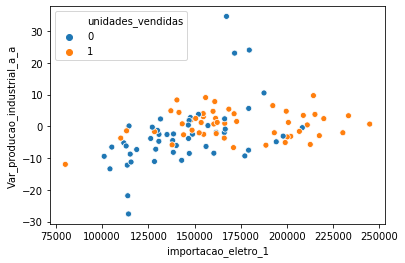

In [35]:
sns.scatterplot(data=dataset, x='importacao_eletro_1', y='Var_producao_industrial_a_a', hue='unidades_vendidas')
plt.show()

C:\Users\berna\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


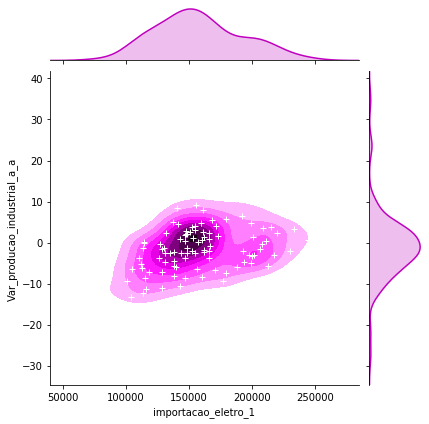

In [289]:
# Distribuição bivariada
g = sns.jointplot(x = "importacao_eletro_1", y = "Var_producao_industrial_a_a", data = dataset, kind = "kde", color = "m",hue='unidades_vendidas')
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

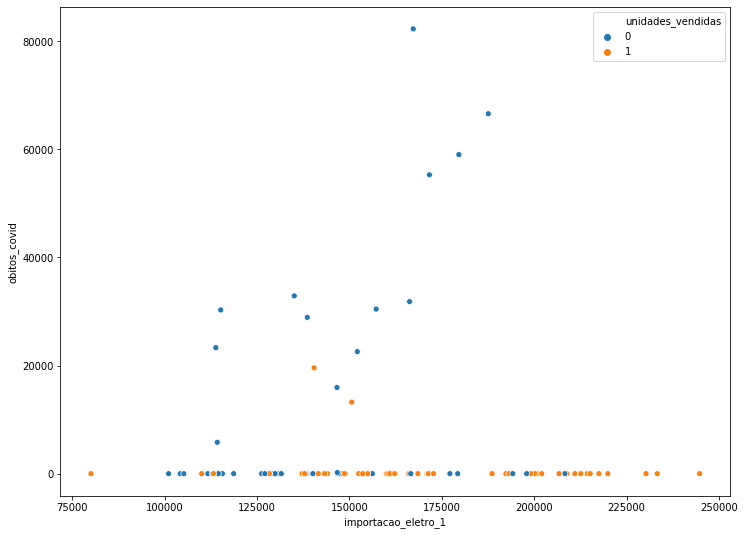

In [290]:
sns.scatterplot(data=dataset, x='importacao_eletro_1', y='obitos_covid', hue='unidades_vendidas')
plt.show()

In [416]:
dataf2 = pd.read_excel('dataf.xlsx')

In [417]:
dataf2 = dataf2.drop(['Unnamed: 0'], 1, inplace = False)

In [418]:
dataf2

,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,unidades_vendidas
0,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,282886
1,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,220859
2,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,277268
3,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,325865
4,678,7.44,451106555,439054.200000,2.44,0,219928.6328,308411
...,...,...,...,...,...,...,...,...
97,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,186718
98,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,208801
99,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,191853
100,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,206221


## RNA

In [419]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = dataf2.iloc[:,:-1]
y = dataf2['unidades_vendidas'].values


escala= StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)


X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm,y,test_size=0.2,random_state=0)

In [445]:
rna = MLPRegressor(hidden_layer_sizes=(2,2,2),max_iter=20000,
                   tol=0.0000001,
                   learning_rate_init=0.1,
                   solver='lbfgs',
                   activation='relu',
                   learning_rate='constant',
                    verbose=2)

rna.fit(X_norm_train,Y_train)

Y_rna_pred = rna.predict(X_norm_test)

score = sqrt(mean_squared_error(Y_test,Y_rna_pred))
print(int(score))

14685


 Dados teste RNA: 
    R2 Score: 0.8201356818013219 
    RMSE 14685.481518989394


 Dados treino RNA: 
   R2 Score: 0.900348378821508 
   RMSE 16060.017473362546


Text(0.5, 1.0, 'RNA:MLP - Real X Previsto - Dados novos')

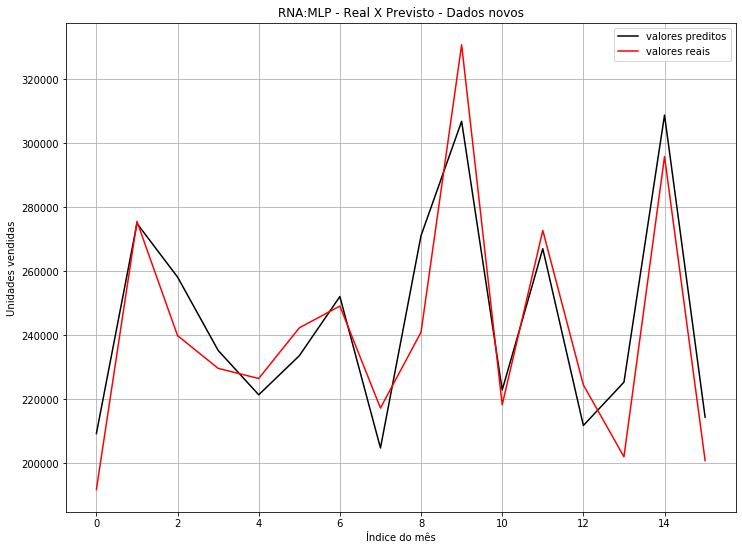

In [460]:
Y_rna_treino = rna.predict(X_norm_train)

r2rna = r2_score(Y_test,Y_rna_pred)
r2rnatreino = r2_score(Y_train,Y_rna_treino)
scoretreino = sqrt(mean_squared_error(Y_train,Y_rna_treino))

print(' Dados teste RNA: \n    R2 Score:', r2rna,'\n','   RMSE',score)
print('\n')    
print(' Dados treino RNA: \n   R2 Score:', r2rnatreino,'\n','  RMSE',scoretreino)

plt.rcParams['figure.figsize'] = (12,9)
plt.plot(Y_rna_pred[5:300],'-',color='black',label='valores preditos')
plt.plot(Y_test[5:300],'-',color='red',label='valores reais')
plt.grid(True)
plt.legend()
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('RNA:MLP - Real X Previsto - Dados novos')

In [449]:
import pickle
with open ('RNA Modelo para importar e usar2.ipynb','wb') as file:
    pickle.dump(rna, file)

In [450]:
import pickle

with open('RNA Modelo para importar e usar2.ipynb', 'rb') as f:
    model = pickle.load(f)

In [451]:
y_rna_treino_import= model.predict(X_norm_train)
r3rnatreino = r2_score(Y_train,y_rna_treino_import)
scoretreino2 = sqrt(mean_squared_error(Y_train,y_rna_treino_import))

In [452]:
print(' Dados treino RNA: \n    R2 Score:', r3rnatreino,'\n','   RMSE',scoretreino2)
print('\n')    

 Dados treino RNA: 
    R2 Score: 0.900348378821508 
    RMSE 16060.017473362546




In [453]:
## mudar isso daqui
projecoes = pd.read_excel('projecoes.xlsx')

In [454]:
projecoes

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid
0,2.33,2.47,2.25,1100,26.38,127177.5,3.21,120000
1,2.28,1.46,1.57,1100,24.31,131373.6,3.01,130000
2,2.00,0.25,1.23,1100,23.58,138690.5,0.00,154222
3,0.92,1.38,0.80,1100,24.90,141388.1,-3.89,56555
4,-0.26,0.99,0.61,1100,26.00,139605.8,2.54,80254
5,-1.00,0.04,0.50,1100,24.75,137993.4,-1.55,45620
6,0.50,0.08,0.20,1100,24.00,145970.6,-2.40,52550
7,0.38,0.18,0.35,1100,23.43,144819.4,-2.39,152000
8,2.00,0.80,0.78,1100,23.00,148559.8,3.57,52555
9,0.25,0.39,0.50,1100,21.56,154925.9,0.90,65222


In [455]:
Xx = projecoes.iloc[:,:7]
escala= StandardScaler()
escala.fit(Xx)

X_norm = escala.transform(Xx)

In [456]:
prj = model.predict(X_norm)

Text(0.5, 1.0, 'Random Forest - Real X Previsto - Dados novos')

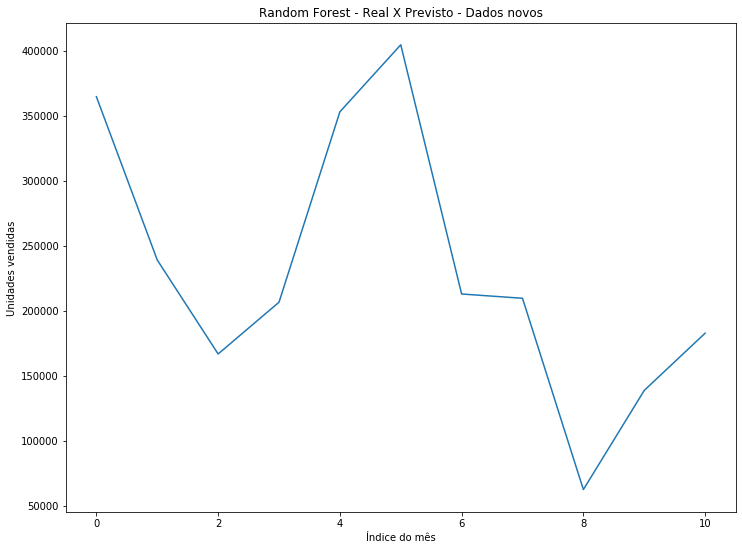

In [457]:
prj
plt.plot(prj)
plt.xlabel('Índice do mês')
plt.ylabel('Unidades vendidas')
plt.title('Random Forest - Real X Previsto - Dados novos')